# Prétraitement des données audio

# Importation des packages

In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import json
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

# Connection avec Google Drive

Ajoutez un raccourci de ce dossier à votre Google Drive :

https://drive.google.com/drive/folders/1NGH6ntk3qH8Odo7q8YxDS0iqV-httZUR?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Utilisation de l'architecture Convolutional Neural Network (CNN)

Créer un générateur

Séparez les inputs des targets.

Faites en sorte que les inputs soit de dimension (xx, xx, 1).

In [ ]:
def load_data(dataset_path:str):
  with open(dataset_path, "r") as fp:
    data = json.load(fp)

    # Convert lists into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    inputs = inputs[..., np.newaxis]

    return inputs, targets

Utilisez la fonction préalablement créé.

In [ ]:
inputs, targets = load_data("drive/MyDrive/Music_genre_classification/data.json")

Utilisez la fonction `train_test_split` pour séparer le jeu d'entraînement du jeu de test.

In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,
                                                                          targets,
                                                                          test_size=0.3)

Renseignez les dimensions importantes de `inputs_train` dans `input_shape`.

In [ ]:
input_shape = (inputs.shape[1], inputs.shape[2], 1)

Initialisation du modèle

Créez l'architecture suivante:
- une couche `Input` avec pour dimension `input_shape`.
- une couche de convolution avec 32 filtres et un filtre de 3 de côté et avec un padding `same` et relu comme fonction d'activation (utilisez la fonction `conv2D`).
- une couche de max pooling avec la fonction `MaxPooling2D`.
- une couche de convolution avec 64 filtres de 3 de côté et relu comme fonction d'activation.
- une couche de max pooling.
- une couche de flatten avec la fonction `Flatten`.
- une couche dense avec 32 neurones et l'activation relu en utilisant la fonction `Dense`.
- une couche de sortie avec 10 neurones et l'activation softmax.

In [ ]:
def build_model(inpust_shape):
  # create model
  model = keras.Sequential()

  model.add(keras.layers.Input(input_shape))

  # 1st conv layer
  model.add(keras.layers.Conv2D(32, (3, 3), activation="relu"))
  model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding="same"))

  # 2nd conv layer
  model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
  model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding="same"))

  # flattent the output and feed it into dense layer
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation = "relu"))

  # Output layer
  model.add(keras.layers.Dense(10, activation="softmax"))

  return model

Utilisez la fonction créé précédemment pour initialiser le modèle.

In [ ]:
# Build the CNN net
model = build_model(input_shape)

Choisir l'algorithme d'optimisation

Utilisez la fonction `Adam` avec 0.0001 comme laerning rate.

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

Compilation du modèle

Utilisez la `sparse_categorical_crossentropy` comme fonction de coût et l'accuracy comme métrique.

In [ ]:
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Visualisez le modèle grâce à la méthode `summary`.

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 126, 9, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 5, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 61, 3, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 31, 2, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3968)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │         127,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 146,666 (572.91 KB)

 Trainable params: 146,666 (572.91 KB)

 Non-trainable params: 0 (0.00 B)

Entraîner le modèle en utilisant les données d'entraînement, les données de test pour la `validation_data`, un batch size de 32 et 50 epochs.

In [ ]:
history = model.fit(inputs_train,  targets_train,
          validation_data=(inputs_test, targets_test),
          batch_size=32,
          epochs=50)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.2306 - loss: 3.1390 - val_accuracy: 0.3852 - val_loss: 1.7827
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4176 - loss: 1.6582 - val_accuracy: 0.4469 - val_loss: 1.5495
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4831 - loss: 1.4444 - val_accuracy: 0.4836 - val_loss: 1.4308
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5403 - loss: 1.2833 - val_accuracy: 0.5230 - val_loss: 1.3749
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5817 - loss: 1.1807 - val_accuracy: 0.5411 - val_loss: 1.2917
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6089 - loss: 1.0966 - val_accuracy: 0.5521 - val_loss: 1.2725
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6594 - loss: 0.9829 - val_accuracy: 0.5691 - val_loss: 1.2221
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6731 - loss: 0.9257 - val_accuracy: 0

Visualisation de l'entraînement

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

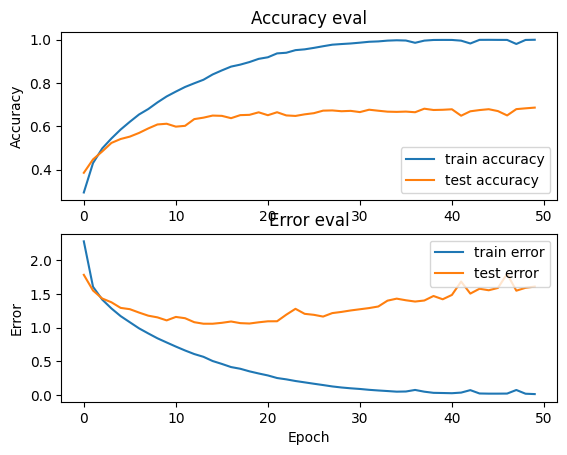

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6747 - loss: 1.6833
Accuracy on test set is: 0.6859145760536194


In [ ]:
# plot accuracy/error for training and validation
plot_history(history)

# evaluate model on test set
test_error, test_accuracy = model.evaluate(inputs_test, targets_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))